#   **Pattern recognition course | ECE AUTH | 2nd project | Winter semester 2022**

# **Gaming stress**

![ logo](keyboard-and-mouse.png)



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [1]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

# Data that are given by the task

ω1: no stress, 
ω2: stress


P(ω1) = 7/12, 
P(ω2) = 5/12

# **Part A**
![ p(x|θ)](p_x_theta.jpg)

# **Task A.1**
## Data: 

D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]

D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

D1 is referring to ω1 class and D2 is referring to ω2 

![ p(D|θ)](p_D_theta.jpg)


![ θ_ML](theta_ML.jpg)

In [8]:
#A-priori probabilities
P_apriori1 = 7/12
P_apriori2 = 5/12

#Data for ω1
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]

#Data for ω2
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

begin = -60
end = 60
step = 0.01
theta = np.arange(begin, end, step)

Estimation of theta1: 2.5999999999875456
Estimation of theta2: -3.1600000000113084


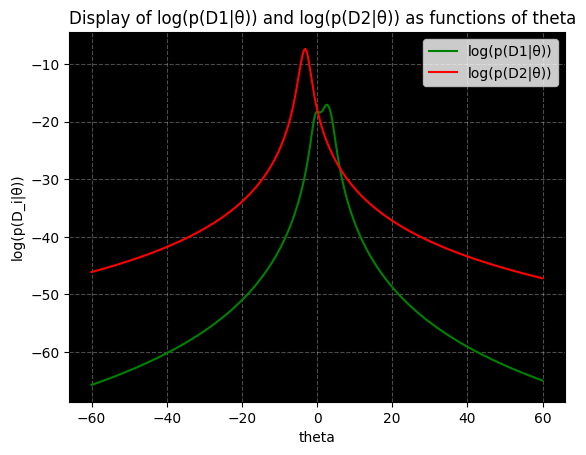

In [9]:
#Task A1

#Initialising p1 and p2 where p_i = p(x_i|theta) as can be seen from the pictures above
p1 = 1
p2 = 1

#Calculating L(θ)
for x in D1:
    p1 *= (1/math.pi)*(1/(1+(x-theta)**2))

for x in D2:
    p2 *= (1/math.pi)*(1/(1+(x-theta)**2))

#L_i = log(p(x_i|theta))
L1 = np.log(p1)
L2 = np.log(p2)

#Finding the max value (theta_i) of L_i array instead of calculating via the derivative method: d(L) / d(theta) = 0
theta1 = theta[L1.argmax()]
theta2 = theta[L2.argmax()]

#Estimation of theta_i
print(f"Estimation of theta1: {theta1}")
print(f"Estimation of theta2: {theta2}")

#Plotting log(p(D_i|theta))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(theta,L1, color="green")
plt.plot(theta,L2, color="red")
plt.title("Display of log(p(D1|θ)) and log(p(D2|θ)) as functions of theta", loc="left")
plt.xlabel("theta")
plt.ylabel("log(p(D_i|θ))")
plt.legend(["log(p(D1|θ))", "log(p(D2|θ))"])
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Task A.2**

discrimination function: g(x) = log(P(x|theta1)) - log(P(x|theta2)) + logP(ω1) - logP(ω2)

where X = D1 U D2 (?)

![ g(x)](g.jpg)

g is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073, -2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 12
g1 is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073] and is size of 7
g2 is [-2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 5


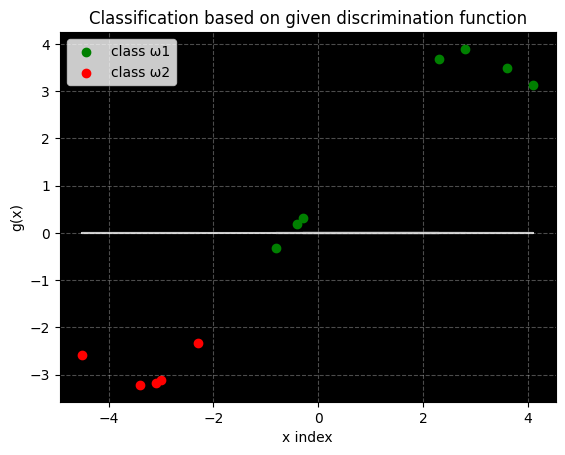

In [10]:
#Index X = D1 U D2
X = D1 + D2

#Discrimination Function g
g = list()

#g = g1 - g2
g1 = list()
g2 = list()

for x in X:
    temp = (np.log((1/math.pi)*(1/(1+(x-theta1)**2))) - np.log((1/math.pi)*(1/(1+(x-theta2)**2)))) + (np.log(P_apriori1) - np.log(P_apriori2))
    g.append(temp)

#g1 and g2 generated from g
g1 = g[:len(D1)]
g2 = g[len(D1):]

print(f"g is {g} and is size of {np.size(g)}")
print(f"g1 is {g1} and is size of {np.size(g1)}")
print(f"g2 is {g2} and is size of {np.size(g2)}")
discrimination_line = [0 for _ in range(len(X))]

#Need to implement subplots if wanted the second one
#Classification and visualisation
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(D1, g1, color="green")
plt.scatter(D2, g2, color="red")
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("g(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.legend(["class ω1", "class ω2"])
plt.show()

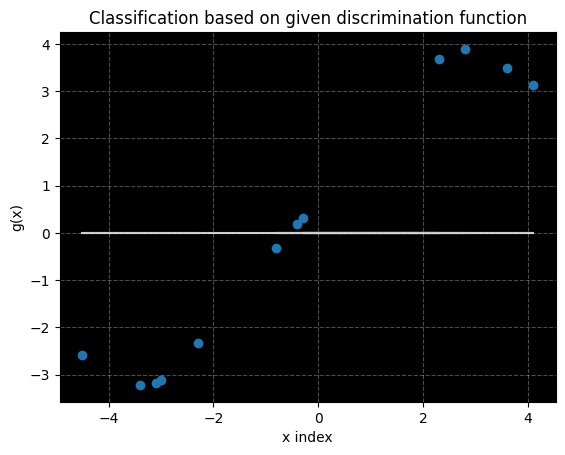

In [11]:
#Just classification
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(X, g)
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("g(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Part B**

# **Useful functions**

In [12]:
# ***Function for plotting into subplots at the same figure***
#_____________________________________________________________
# fig: the figure in which will be done the plotting
# figx: number of subplot placeholders on the x axis
# figy: number of subplot placeholders on the y axis
# fig_no: the place where the plot will be putted
# title: the title of the plot
# x_label: the label for the x axis of the plot
# y_label: the label for the y axis of the plot
# x: values for the x axis
# y: values for the y axis
#_____________________________________________________________
# There are some changes to the background color and the type of the grid too. But those changes are not to be changed by given arguments
def vizualize(fig, figx, figy, fig_no, title, x_label, y_label, x, y):
    ax = fig.add_subplot(figy, figx, fig_no)
    ax.set_facecolor('black')
    ax.grid(color='white', linestyle="--", alpha=0.3)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)
    plt.legend(loc = "lower right") # *********Problem****************

# ***Same as the previous function but for more that one plots at the same subplot***
#________________________________________________________________
# y: a list of numpy arrays
#________________________________________________________________
def vizualize_more(fig, figx, figy, fig_no, title, x_label, y_label, x, y):
    ax = fig.add_subplot(figy, figx, fig_no)
    ax.set_facecolor('black')
    ax.grid(color='white', linestyle="--", alpha=0.3)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for i in range(len(y)):
        plt.plot(x, y[i])
    plt.legend(loc = "lower right") # *********Problem****************

![ p(θ)](Part_B.jpg)

___The θ values:___
[-60.   -59.99 -59.98 ...  59.97  59.98  59.99]

___The pdf values:___
[0.0008603  0.00086058 0.00086086 ... 0.00086113 0.00086086 0.00086058]

___The plot of the pdf of θ:___


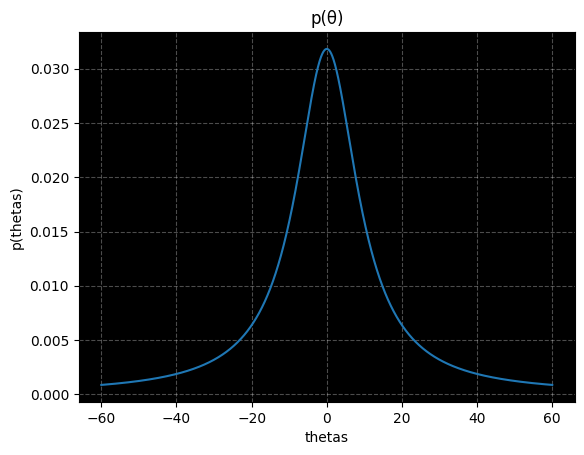

In [13]:
# Prior probability density function for θ based on the task's given data
p_theta = (1/(10*math.pi)) * (1/(1 + (theta/10)**2))

# Print θ and pdf values to be sure
print("___The θ values:___")
print(theta)
print("")
print("___The pdf values:___")
print(p_theta)
print("")

# Plot the pdf
print("___The plot of the pdf of θ:___")
ax = plt.axes()
ax.set_facecolor("black")
plt.title("p(θ)") 
plt.xlabel("thetas") 
plt.ylabel("p(thetas)") 
plt.plot(theta, p_theta)
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Task B.1**

> Computation of `p(θ|D1) and p(θ|D2)`

![ p(θ|Di)](p_theta_D.jpg)

# **Useful custom functions**

> `p(θ|Di)` function implementation

In [14]:
# p(θ|Di) function for better code usability
#____________________________________________
# p: the pdf values of Di based on theta | p(Di|θ)
# p_theta: the pdf values of θ random variable | p(θ)
# step: the step we used to create the theta values
#____________________________________________
# Make sure that p and p_theta have been calculated using the same theta-set
def p_theta_Di(p, p_theta, step):
    # Multiplication computation for both the denominator and the numerator
    numerator = np.multiply(p, p_theta)
    # Integral computation (Approximation using sum and the rule of the trapezoid)
    integral = 0
    for i in range(1, numerator.size):
        integral += ((numerator[i] + numerator[i-1]) * step) / 2
    # p(θ|D_i) computation
    p_theta_D = numerator/integral
    return p_theta_D

# **Implementation and vizualization**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


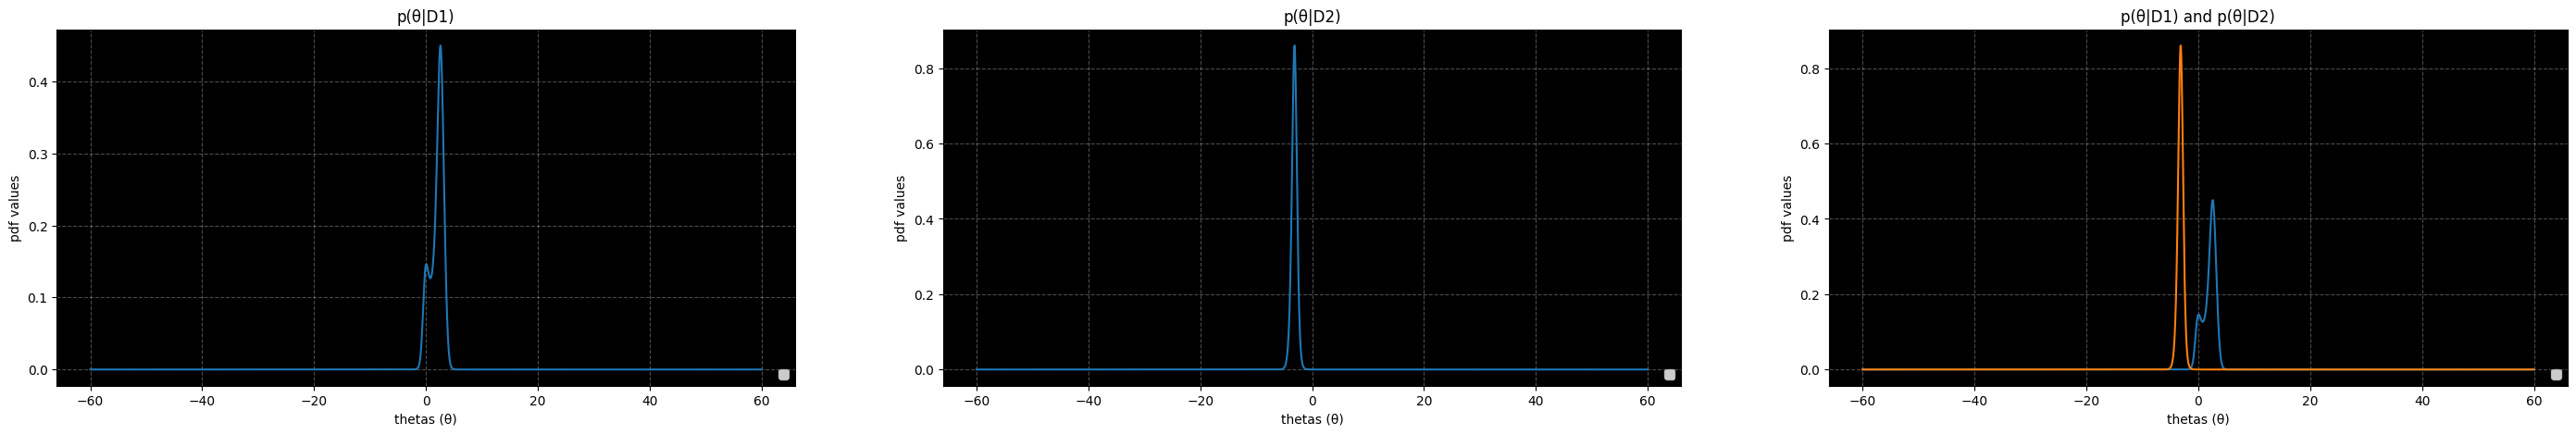

In [15]:
# p(D_i|θ) exists because of task A.1
# p(θ) has been computed at the beginning of task B
# To compute the p(θ|Di) we use the custom made function above
p_theta_D1 = p_theta_Di(p1, p_theta, step) #
p_theta_D2 = p_theta_Di(p2, p_theta, step)


# Plot the computed pdfs
# Prepare the figure
fig = plt.figure(figsize=(35, 5))
title1 = "p(θ|D1)"
title2 = "p(θ|D2)"
title3 = "p(θ|D1) and p(θ|D2)"
x_label = "thetas (θ)"
y_label = "pdf values"

# Plot separately
# We will have 3 subplots so we use the custom made functions
vizualize(fig, 3, 1, 1, title1, x_label, y_label, theta, p_theta_D1)
vizualize(fig, 3, 1, 2, title2, x_label, y_label, theta, p_theta_D2)
combine_list = [p_theta_D1, p_theta_D2]
vizualize_more(fig, 3, 1, 3, title3, x_label, y_label, theta, combine_list)

# Show all plots
plt.show()

# **Results and comments**



# **Task B.2**

> `Predict` function implementation

![ h(x)](predict.jpg)

![ p(x|Di)](predict2.jpg)

# **Useful custom functions**

> `p(x|θ)` function implementation  
> `p(x|Di)` function implementation  
> `predict` function implementation

In [16]:
# Make sure that everything has been calculated using the same theta-set

# p(x|θ) function
#____________________________________________
# x: the x value
# theta: the theta value
#____________________________________________
def p_x_theta(x, theta):
    return ((1/math.pi) * (1/(1 + (x - theta) ** 2)))

# p(x|D) function
#____________________________________________
# x: specific x value
# theta: all the theta values
# p: the pdf values of Di based on theta | p(Di|θ)
# p_theta: the pdf values of θ random variable | p(θ)
# step: the step we used to create the theta values
#____________________________________________
def p_x_Di(x, theta, p, p_theta, step):
    integral = 0
    mult = p_x_theta(x, theta) * p_theta_Di(p, p_theta, step)
    for i in range(1, len(theta)):
        integral += ((mult[i] + mult[i-1]) * step) / 2
    return integral

# predict function declaration and implementation
#________________________________________________
# x: specific x value
# theta: all the theta values
# p1: the pdf values of Di based on theta | p(D1|θ)
# p2: the pdf values of Di based on theta | p(D2|θ)
# p_theta: the pdf values of θ random variable | p(θ)
# step: the step we used to create the theta values
#________________________________________________
def predict(x, theta, p1, p2, p_theta, step):
    ret = []
    for i in x:
        temp = np.log(p_x_Di(i, theta, p1, p_theta, step)) - np.log(p_x_Di(i, theta, p2, p_theta, step)) + np.log(P_apriori1) - np.log(P_apriori2)
        ret.append(temp)
    return ret

# **Applying and plotting**

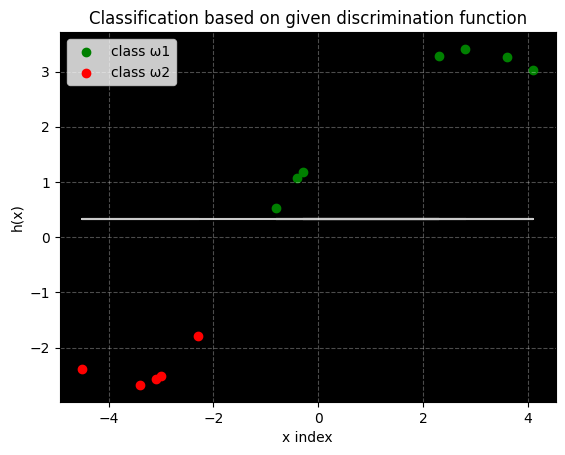

In [17]:
h1 = predict(D1, theta, p1, p2, p_theta, step)
h2 = predict(D2, theta, p1, p2, p_theta, step)
boundary = np.log(P_apriori1) - np.log(P_apriori2)
discrimination_line = [boundary for _ in range(len(X))]

# Plot the computed pdfs
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(D1, h1, color="green")
plt.scatter(D2, h2, color="red")
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("h(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.legend(["class ω1", "class ω2"])
plt.show()

# **Results and comments**

